Introduction to Support Vector Machine (SVM)
Support Vector Machine (SVM) is a popular and powerful supervised machine learning algorithm that is used for both classification and regression tasks. It works by finding the optimal boundary (also called a hyperplane) that best separates data points of different classes in a feature space.
In simpler terms, SVM tries to draw a straight line (or a higher-dimensional boundary) between two groups of data points in such a way that it maximizes the margin (the distance) between the closest points from each group. These closest points are called support vectors, and they are critical to defining the decision boundary.

Key Concepts:
-Hyperplane: In two-dimensional space, a hyperplane is just a line that separates data points. In higher-dimensional spaces, it's a flat, n-1 dimensional surface that separates data points.

-Support Vectors: These are the data points that are closest to the hyperplane. They help define the decision boundary. The model's performance is heavily dependent on these points.

-Margin: The distance between the support vectors and the hyperplane. SVM aims to maximize this margin to ensure the best separation between classes.

-Kernel: Sometimes, data is not linearly separable in its current form, meaning it cannot be separated by a straight line (or hyperplane). SVM uses kernel functions to transform the data into higher dimensions, where it becomes easier to separate the classes with a hyperplane.

Definition:
SVM is an algorithm that finds the best line (or hyperplane) to separate different classes in the feature space, and it tries to maximize the margin between the classes to make accurate predictions.

Types of SVM Algorithms:
-Linear SVM:
This is the simplest form of SVM. It is used when the data is linearly separable, meaning you can draw a straight line (or hyperplane) that separates the two classes without any overlap.
Example: Imagine you are separating apples and oranges based on weight and color. A straight line can separate them well.

-Non-Linear SVM:
When the data is not linearly separable, SVM can use a kernel trick to transform the data into higher dimensions where a hyperplane can be used to separate the classes. This transformation makes it easier to separate the classes even if they are complex and non-linearly related.
Example: If you are trying to separate fruits based on multiple features like weight, color, texture, etc., a straight line may not work. A non-linear SVM can help in such cases.

-SVM for Classification:
Binary Classification: This is the most common use of SVM, where the algorithm classifies data into one of two classes (e.g., spam vs. not spam).
Multi-class Classification: While SVM is inherently a binary classifier, techniques like One-vs-One (OvO) and One-vs-Rest (OvR) are used to extend it to multi-class classification problems.

-SVM for Regression (SVR):
SVM can also be used for regression tasks, where the goal is to predict a continuous value (e.g., predicting house prices). The algorithm works similarly to classification but instead of classifying data, it tries to predict values.

SVM Algorithms:
Here are the core algorithms and techniques used in SVM:
-Linear SVM (Hard Margin):
This algorithm works by finding a linear hyperplane that perfectly separates the two classes. It's used when the classes are perfectly separable with no overlap.

-Linear SVM with Soft Margin:
This algorithm allows some misclassifications to occur (soft margin) to make the model more robust, especially when data is noisy or imperfectly separable. It is controlled by a parameter C that determines the trade-off between maximizing the margin and minimizing classification errors.

-SVM with Non-Linear Kernels:
Polynomial Kernel: A non-linear kernel that maps the data into higher dimensions where a linear hyperplane can be used to separate the classes.
Radial Basis Function (RBF) Kernel: The most commonly used kernel, it uses the distance between the data points to map the data into a higher-dimensional space, making it possible to separate classes even in very complex data.
Sigmoid Kernel: Another non-linear kernel that uses the hyperbolic tangent function to map the data into higher dimensions.

-SVM for Regression (SVR):
In regression problems, the goal is to find a function that predicts a continuous value. The SVR model tries to find a hyperplane that best fits the data, with a margin of tolerance for errors.
Epsilon-SVR: This version of SVR allows errors within a certain margin (epsilon) while still fitting the model as closely as possible.

Summary of SVM Types:
-Linear SVM: Best for linearly separable data.
-Non-Linear SVM: Uses kernels (e.g., RBF, Polynomial) to handle non-linearly separable data.
-SVM for Classification: Used to classify data into distinct categories.
-SVM for Regression (SVR): Used for predicting continuous values.

SVM is powerful, flexible, and can be applied to various problems, especially when high accuracy is needed. However, it can be -computationally expensive, particularly with large datasets, and it requires careful selection of parameters like the kernel and regularization terms (C and epsilon).

In [1]:
# Step 1: Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the tips dataset
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape, df.size

((244, 7), 1708)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [19]:
# Step 3: Data preprocessing
# Select all features except 'tip' (target)
x = df.drop(columns = 'tip')
y = df['tip']

In [21]:
# Step 4: Handle categorical data (if present)
# We have a categorical column 'sex' and 'day' which need to be encoded
x = pd.get_dummies(x, drop_first=True)
x.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,True,True,False,False,True,True
1,10.34,3,False,True,False,False,True,True
2,21.01,3,False,True,False,False,True,True
3,23.68,2,False,True,False,False,True,True
4,24.59,4,True,True,False,False,True,True


In [22]:
x = x.astype(int)
x.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16,2,1,1,0,0,1,1
1,10,3,0,1,0,0,1,1
2,21,3,0,1,0,0,1,1
3,23,2,0,1,0,0,1,1
4,24,4,1,1,0,0,1,1


In [23]:
# Step 5: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [26]:
# Step 6: Feature Scaling (important for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
# Step 7: Train the SVM Regressor
svm_regressor = SVR(kernel='rbf')  # Using radial basis function kernel
svm_regressor.fit(x_train_scaled, y_train)

SVR()

In [33]:
# Step 8: Make predictions
y_pred = svm_regressor.predict(x_test_scaled)

In [34]:
# Step 9: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 10: Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.1553694975469475
Root Mean Squared Error (RMSE): 1.0748811550803872
R-squared (R2) Score: 0.3572975315016219


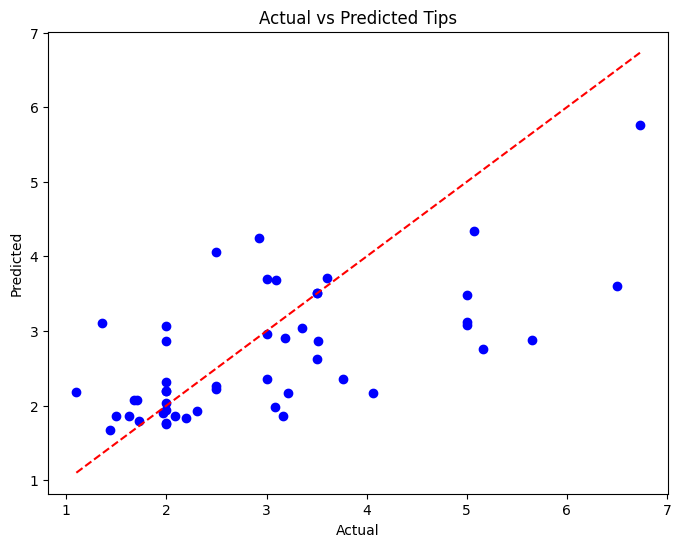

In [35]:
# Step 11: Plotting Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Tips')
plt.show()